In [40]:
import matplotlib.pyplot as plt                           # plotting
from matplotlib.patches import Ellipse
import scipy.stats                                        # summary stats of ndarrays
import numpy as np

import gstools as gs
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

AttributeError: 'numpy.ndarray' object has no attribute 'name'

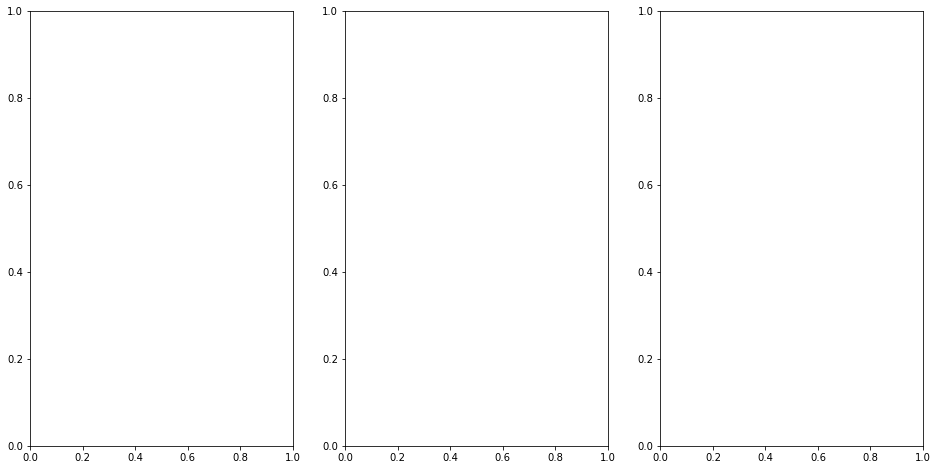

In [41]:
x = y = np.arange(100)
vario_model = gs.Spherical(dim=2, var=1, len_scale=[12.0, 3.0], angles=np.pi / 8)

fig,axes = plt.subplots(1,3)
fig.set_size_inches(16,8)

srf = gs.SRF(vario_model, seed=20170519)
srf.structured([x, y])
srf.plot(fig=fig, ax= axes)

vario_model.vario_spatial(0)

fig.axes[0].set_aspect("equal")

Anisotropy representations:
Anis. ratios: [0.25]
Main length scale 12.0
All length scales [12.  3.]


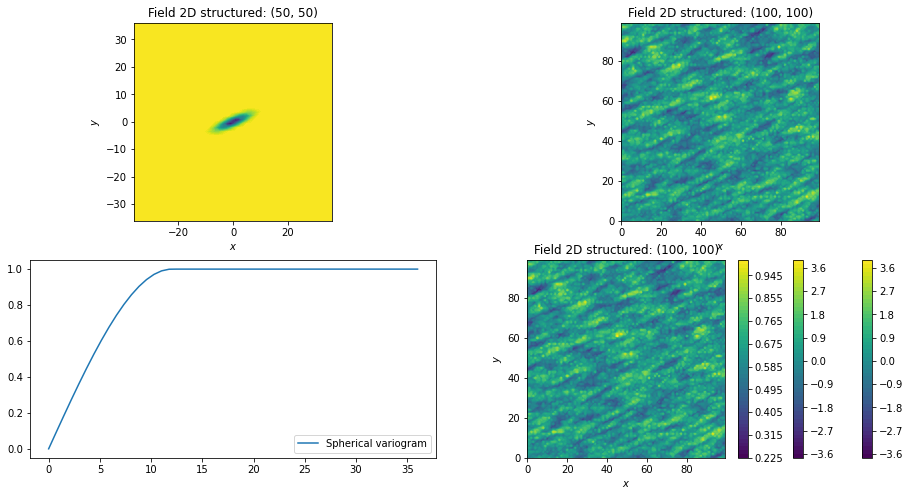

In [39]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,8)
axes[0,0].set_aspect("equal")
axes[0,1].set_aspect("equal")
axes[1,1].set_aspect("equal")

x = y = np.arange(100)
vario_model = gs.Spherical(dim=2, var=1, len_scale=[12.0, 3.0], angles=np.pi / 8)

srf = gs.SRF(vario_model, seed=20170519)
srf.structured([x, y])
srf.plot(fig=fig, ax= axes[0,1])
srf.plot(fig=fig, ax= axes[1,1])

gs.covmodel.plot.plot_variogram(vario_model,fig=fig,ax=axes[1,0])
vario_model.plot("vario_spatial",fig=fig,ax=axes[0,0])
print("Anisotropy representations:")
print("Anis. ratios:", vario_model.anis)
print("Main length scale", vario_model.len_scale)
print("All length scales", vario_model.len_scale_vec)

In [28]:

vario_model.plot(fig=fig)

fig.axes[0].set_aspect("equal")
plt.show()

In [21]:
fig.axes

[<AxesSubplot:title={'center':'Field 2D structured: (100, 100)'}, xlabel='$x$', ylabel='$y$'>,
 <AxesSubplot:label='<colorbar>'>]

<AxesSubplot:>

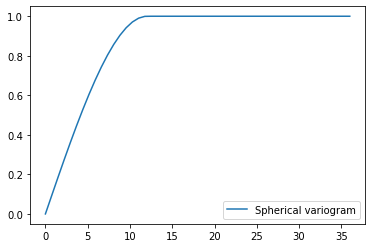

In [13]:
vario_model.plot()

 x,y,z offsets = 14.142135661806455,-14.142135585655446


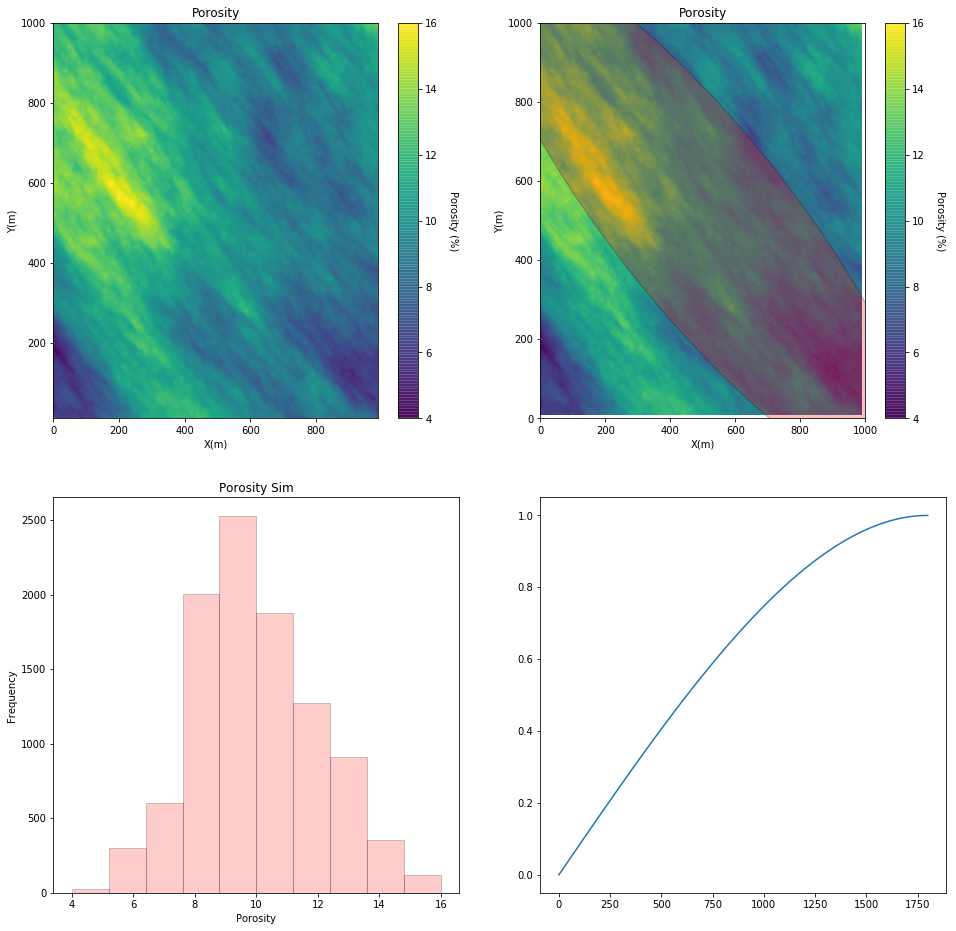

In [14]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16,16)

plt.subplot(221)
GSLIB.pixelplt_st(sim,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,"Porosity","X(m)","Y(m)","Porosity (%)",cmap)
axs[0,0].set_aspect("equal")

plt.subplot(222)
ax=GSLIB.pixelplt_st(sim,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,"Porosity","X(m)","Y(m)","Porosity (%)",cmap)
ax=plt.gca()
vario_shape = Ellipse([0.5*(xmin+xmax),0.5*(ymin+ymax)],vario["hmaj1"],vario["hmin1"],vario["azi1"])
ax.add_artist(vario_shape)
vario_shape.set_clip_box(ax.bbox)
vario_shape.set_alpha(0.25)
vario_shape.set_facecolor("red")
vario_shape.set_edgecolor("black")

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.subplot(223)
GSLIB.hist_st(sim.ravel(), vmin, vmax, log=False, cumul=False, bins=10, weights=np.ones_like(sim.ravel()), xlabel="Porosity", title="Porosity Sim")

plt.subplot(224)
index,h,gam,cov,ro = geostats.vmodel(int(vario["hmaj1"]/20),20,vario["azi1"],vario)
plt.plot(h,gam)

In [53]:
def show_vario_sim(pepite,portee1,portee2,seuil,azi,model="Spherique",show_range=True):
    dict_model = {
        'Spherique':gs.Spherical,
        'Exponential':gs.Exponential,
        'Gaussian':gs.Gaussian
    }
    
    fig, axes = plt.subplots(2,2)
    fig.set_size_inches(16,8)
    axes[0,0].set_aspect("equal")
    axes[0,1].set_aspect("equal")
    axes[1,1].set_aspect("equal")

    x = y = np.arange(250)
    vario_model = dict_model[model](dim=2, nugget=pepite, var=seuil, len_scale=[portee1,portee2], angles= np.deg2rad(azi))

    srf = gs.SRF(vario_model)
    srf.structured([x, y])
    srf.plot(fig=fig, ax= axes[0,1])
    srf.plot(fig=fig, ax= axes[1,1])

    gs.covmodel.plot.plot_variogram(vario_model,fig=fig,ax=axes[1,0])
    vario_model.plot("vario_spatial",fig=fig,ax=axes[0,0])

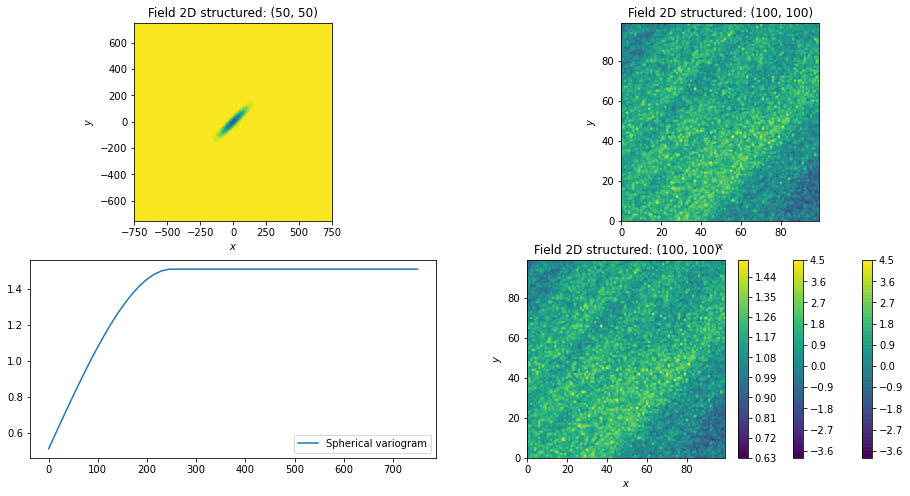

In [51]:
show_vario_sim(0.51,250,50,1,45,"Spherique")

In [54]:
a=interact(show_vario_sim,
         pepite=widgets.FloatSlider(value=0.001,min=0.001,max=1.0,step=0.05,continuous_update=False),
         portee1=widgets.FloatSlider(value=250.0,min=1.0,max=1000.0,step=1,continuous_update=False),
         portee2=widgets.FloatSlider(value=250.0,min=1.0,max=1000.0,step=1,continuous_update=False),
         seuil=widgets.FloatSlider(value=1.0,min=0.1,max=1.0,step=0.05,continuous_update=False),
         azi=widgets.FloatSlider(value=0.0,min=0.0,max=180,step=1,continuous_update=False),
         model=widgets.Dropdown(
            options=['Spherique', 'Exponential', 'Gaussian'],
            value='Spherique',
            description='Model:',
            disabled=False,
        ),
         show_range = widgets.ToggleButton(value=True)
        )

interactive(children=(FloatSlider(value=0.001, continuous_update=False, description='pepite', max=1.0, min=0.0…